## Análisis de frecuencia absoluta y relativa para la base de datos de sismos.

In [1]:
# Carga de librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Para este caso, se utilizará la magnitud de los sismos, que es una medida de la energía liberada por los sismos.

In [17]:
# Cargar los datos
sismos = pd.read_csv("sismos.csv", delimiter=";")

frecuencia_absoluta_mag = sismos['mag'].value_counts()
frecuencia_relativa_mag = sismos['mag'].value_counts(normalize=True)

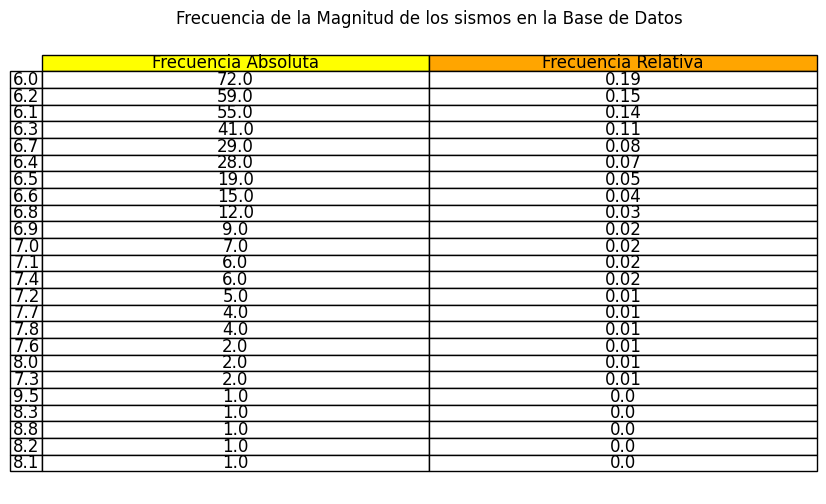

In [40]:
tabla_frecuencia = pd.DataFrame({'Frecuencia Absoluta':frecuencia_absoluta_mag,'Frecuencia Relativa':frecuencia_relativa_mag})

tabla_frecuencia['Frecuencia Relativa'] = tabla_frecuencia['Frecuencia Relativa'].round(2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

tabla = ax.table(cellText=tabla_frecuencia.values,
                 colLabels=tabla_frecuencia.columns,
                 rowLabels=tabla_frecuencia.index,
                 loc='center',
                 cellLoc='center',
                 colColours=['yellow', 'orange'])

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

plt.title('Frecuencia de la Magnitud de los sismos en la Base de Datos')
plt.show()

Se puede apreciar en esta tabla, que la magnitud 6.0 es la más frecuente, seguido de la 6.2 y 6.1.

#### Ahora, analizaremos la hora, para hacer una frecuencia con respecto a la magnitud y la hora.

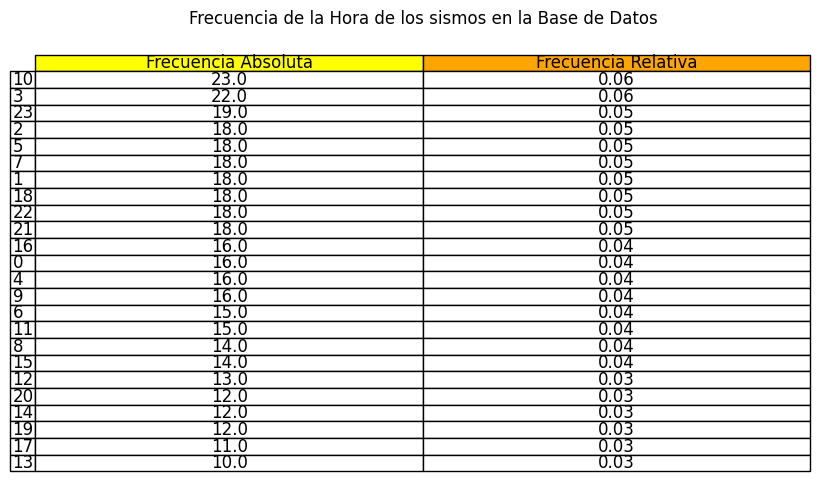

In [41]:
frecuencia_absoluta_hora = sismos['Hora'].value_counts()
frecuencia_relativa_hora = sismos['Hora'].value_counts(normalize=True)

tabla_frecuencia = pd.DataFrame({'Frecuencia Absoluta':frecuencia_absoluta_hora,'Frecuencia Relativa':frecuencia_relativa_hora})

tabla_frecuencia['Frecuencia Relativa'] = tabla_frecuencia['Frecuencia Relativa'].round(2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

tabla = ax.table(cellText=tabla_frecuencia.values,
                 colLabels=tabla_frecuencia.columns,
                 rowLabels=tabla_frecuencia.index,
                 loc='center',
                 cellLoc='center',
                 colColours=['yellow', 'orange'])

tabla.auto_set_font_size(False)
tabla.set_fontsize(12)

plt.title('Frecuencia de la Hora de los sismos en la Base de Datos')
plt.show()

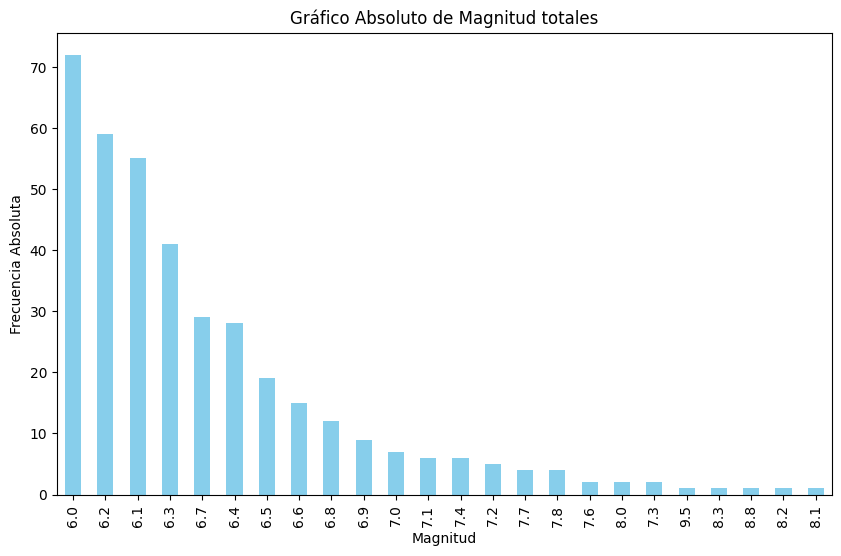

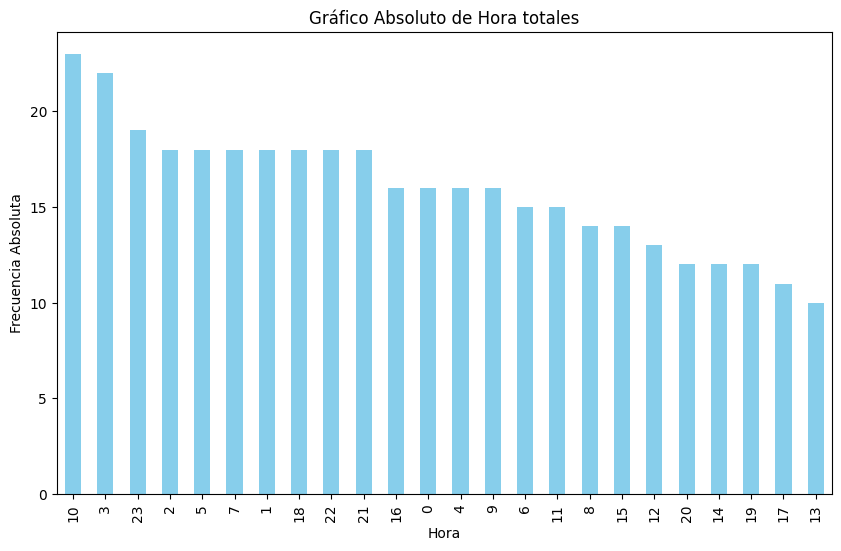

In [42]:
# Análisis de frecuencia para el conjunto de datos

plt.figure(figsize=(10,6))
frecuencia_absoluta_mag.plot(kind='bar', color='skyblue')
plt.title('Gráfico Absoluto de Magnitud totales')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia Absoluta')
plt.show()

plt.figure(figsize=(10,6))
frecuencia_absoluta_hora.plot(kind='bar', color='skyblue')
plt.title('Gráfico Absoluto de Hora totales')
plt.xlabel('Hora')
plt.ylabel('Frecuencia Absoluta')
plt.show()

Como se había mostrado anteriormente, la cantidad más frecuente de hora es a las 10:00 hrs, seguido de las 3:00 hrs.

#### Si agrupamos las magnitudes con respecto a la hora, quedaría de la siguiente manera.

<Figure size 1200x800 with 0 Axes>

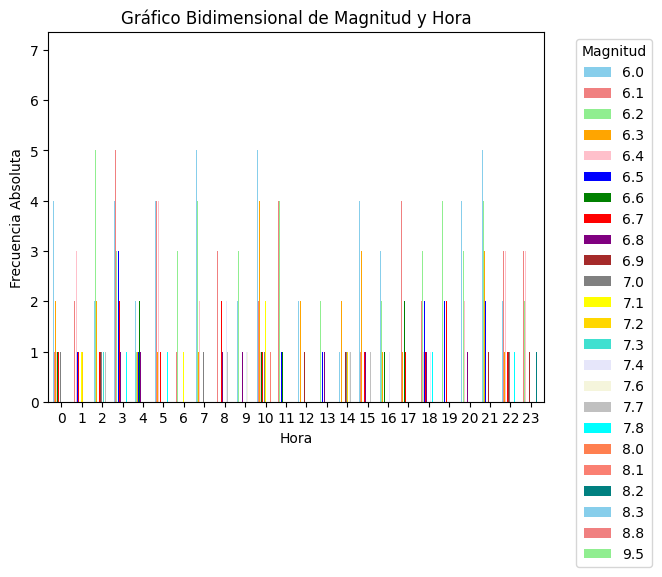

In [43]:
# Gráfico bidimensional de "mag" y "Hora"
grafico_bidimensional = pd.crosstab(sismos['Hora'],sismos['mag'])
colores = ['skyblue','lightcoral','lightgreen','orange','pink','blue','green','red','purple','brown','grey','yellow','gold','turquoise','lavender','beige','silver','cyan','coral','salmon','teal']

plt.figure(figsize=(12, 8))
grafico_bidimensional.plot(kind='bar', color=colores, width=0.8)
plt.title('Gráfico Bidimensional de Magnitud y Hora')
plt.xlabel('Hora')
plt.ylabel('Frecuencia Absoluta')
plt.legend(title='Magnitud', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.show()

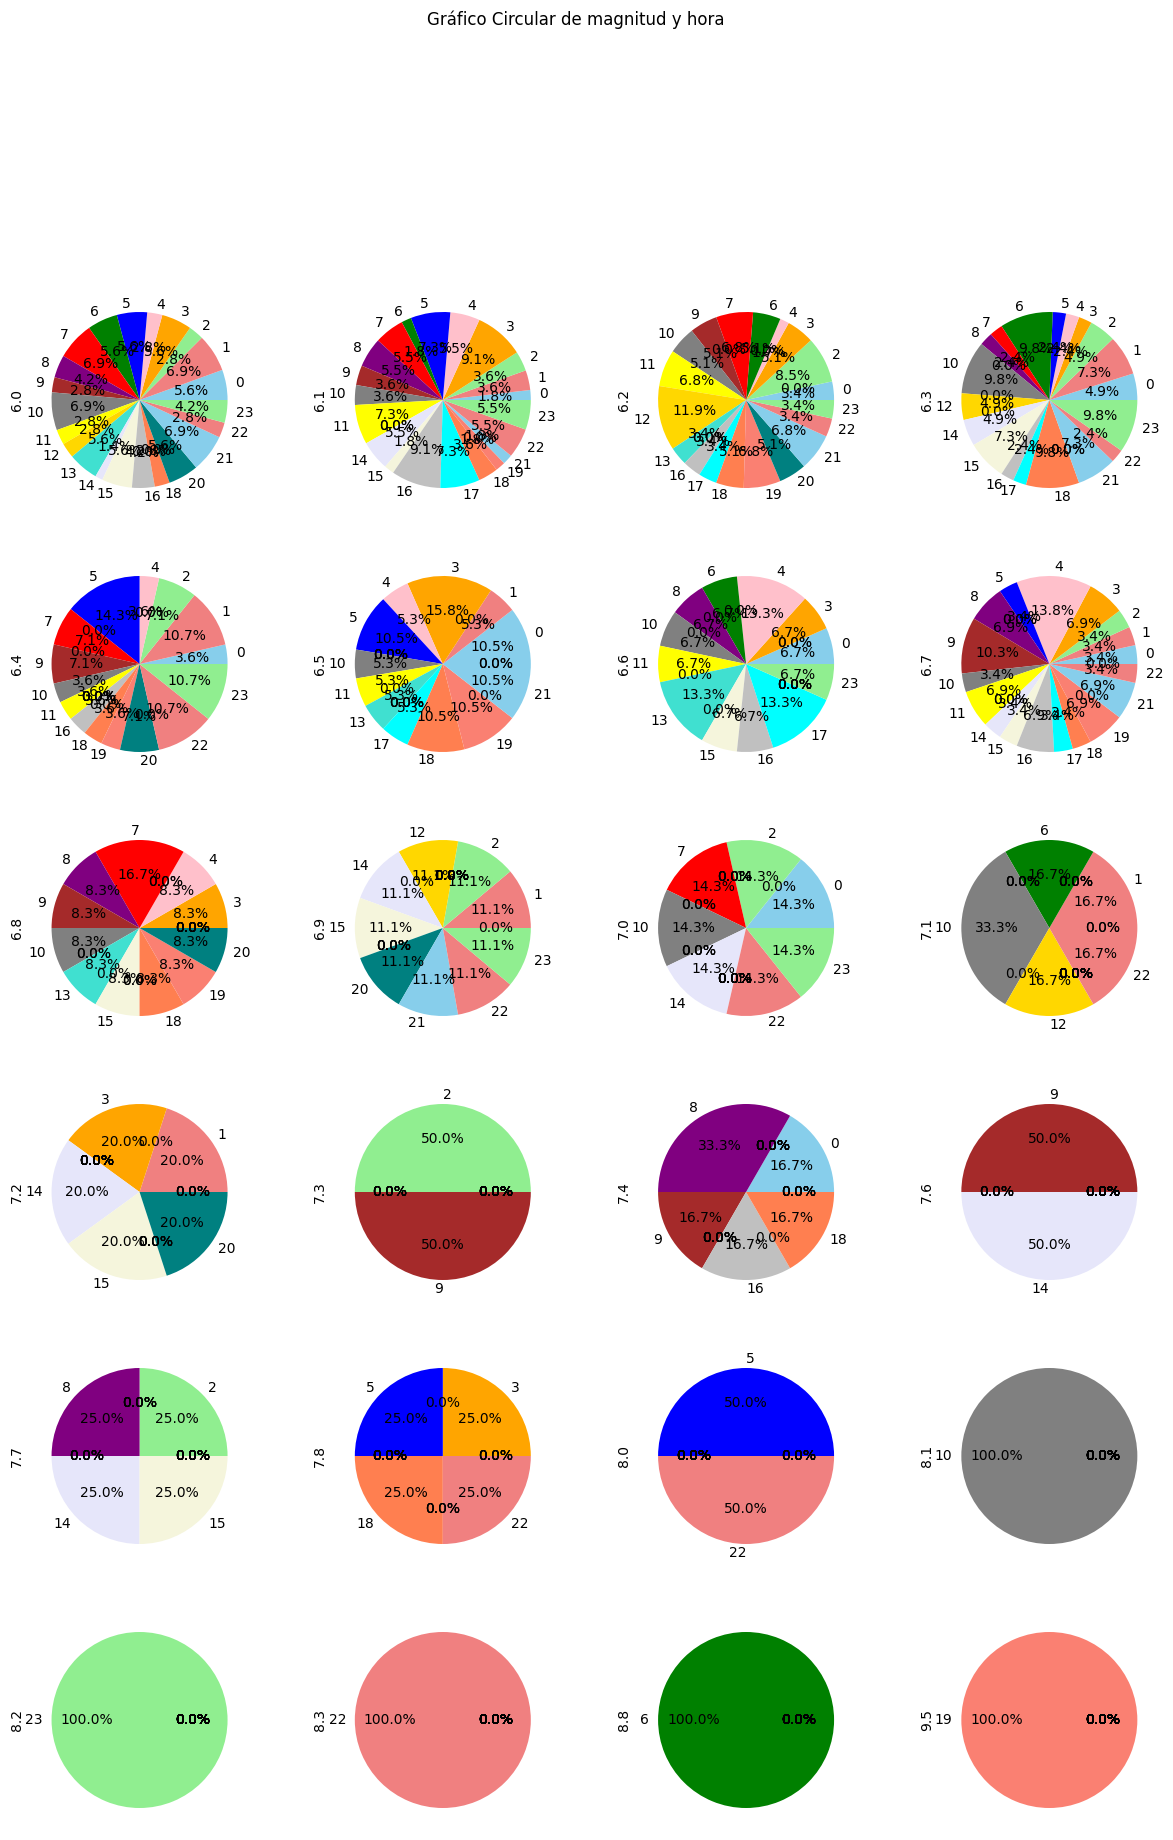

In [30]:
# Gráfico circular
fig, axes = plt.subplots(figsize=(15,20), nrows = 6, ncols = 4)
grafico_bidimensional.plot(kind='pie', subplots=True, autopct='%1.1f%%', colors=colores, ax=axes.flatten(), legend=False)
plt.suptitle('Gráfico Circular de magnitud y hora', y=1.02)
plt.show()

En este caso, no se puede apreciar con tanta claridad los datos de algunos casos, pero se puede sacar algunas conclusiones, como el hecho de que, a las 10:00hrs se registró un sismo de magnitud 8.1, siendo este el único caso con esa magnitud a esa hora, pasa algo pareceido con los casos que los sigue.

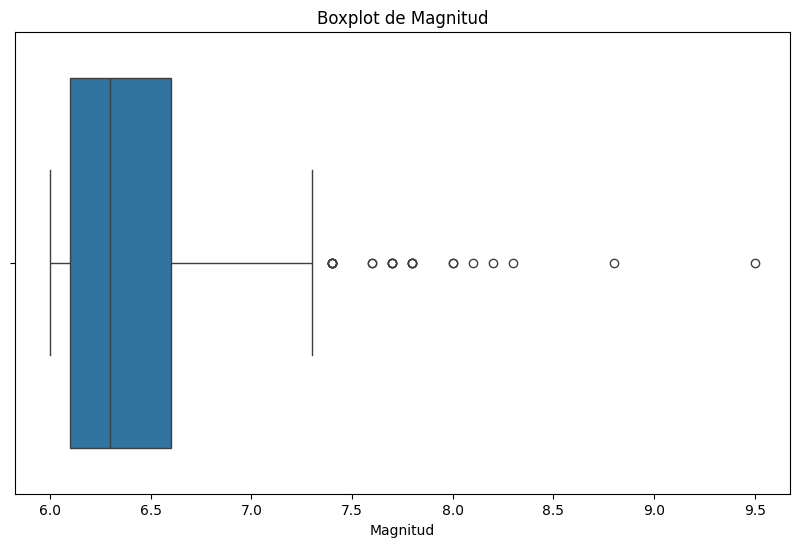

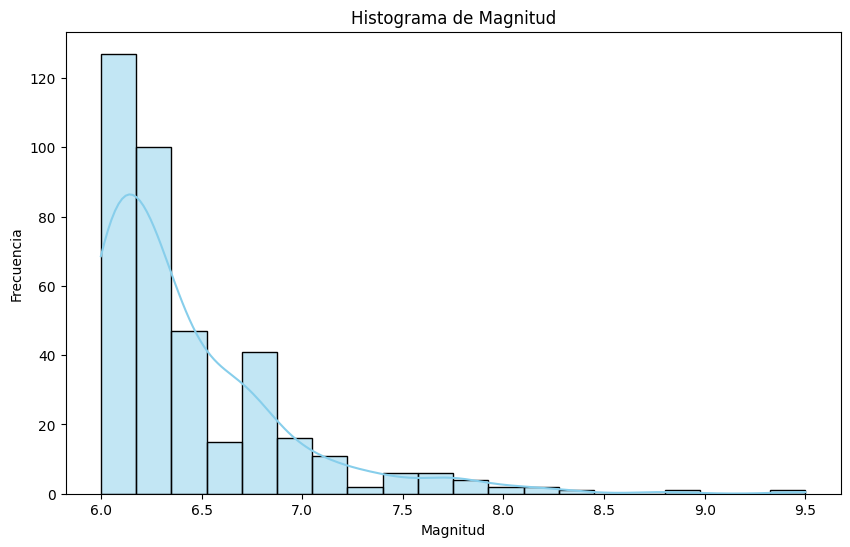

In [44]:
# Gráfico boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=sismos['mag'])
plt.title('Boxplot de Magnitud')
plt.xlabel('Magnitud')
plt.show()

# Gráfico histograma
plt.figure(figsize=(10, 6))
sns.histplot(sismos['mag'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de Magnitud')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.show()

En estos dos diagramas, muestra que la magnitud es más frecuente en los 6.0.

Entonces, viendo que la magnitud más frecuente se encuentra en los 6.0 de magnitud, se podría considerar ese caso para analizar.

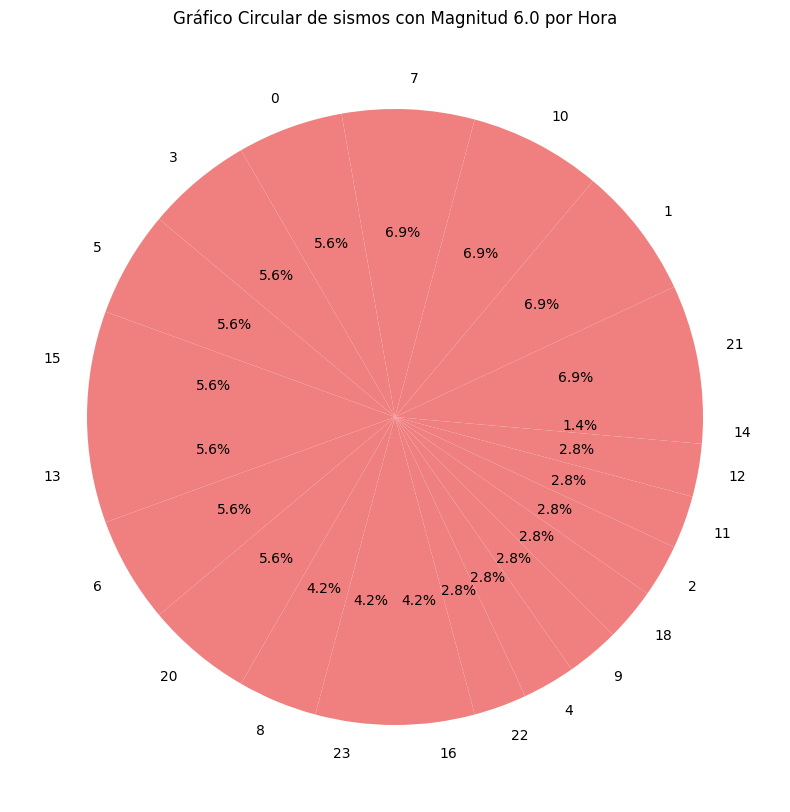

In [45]:
# magnitud 6.0
sismos_magnitud_6 = sismos[sismos['mag'] == 6.0]

# La frecuencia de sismos con magnitud 6.0 por hora
frecuencia_por_hora = sismos_magnitud_6['Hora'].value_counts()

labels = frecuencia_por_hora.index
sizes = frecuencia_por_hora.values

# Gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral'])
ax.set_title('Gráfico Circular de sismos con Magnitud 6.0 por Hora')
plt.show()

En este gráfico se puede ver que la hora más frecuencuente con respecto a la magnitud 6.0 es a las 7:00hrs,10:00hrs, 1:00hrs y 21:00hrs, con un 6.9% para cada una.

#### Haciendo esto mismo, pero para el caso del sismo de magnitud 6.2, se tiene lo siguiente.

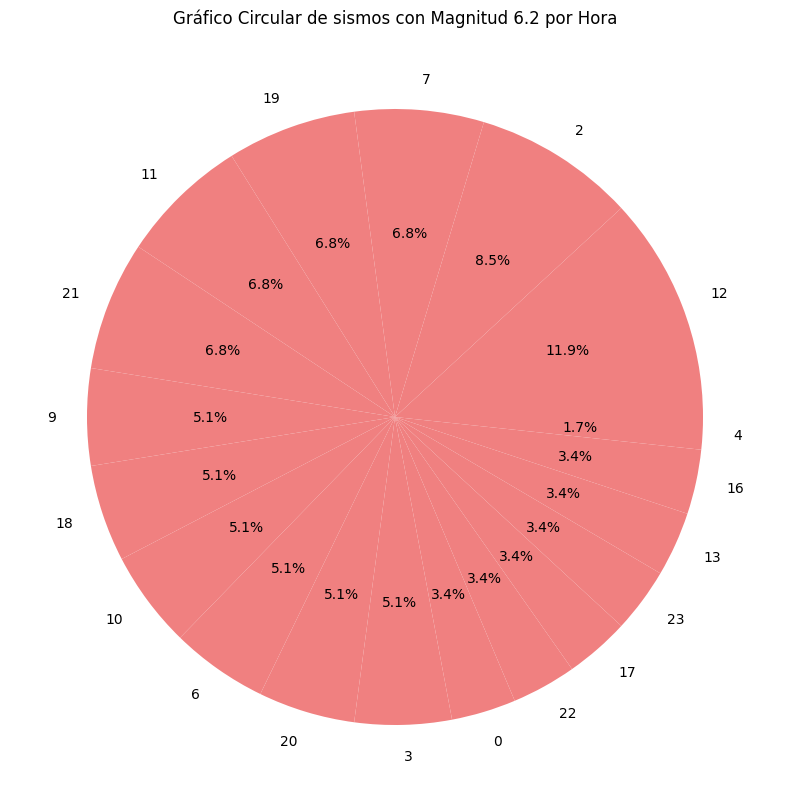

In [46]:
# magnitud 6.2
sismos_magnitud_6_2 = sismos[sismos['mag'] == 6.2]

# La frecuencia de sismos con magnitud 6.0 por hora
frecuencia_por_hora = sismos_magnitud_6_2['Hora'].value_counts()

labels = frecuencia_por_hora.index
sizes = frecuencia_por_hora.values

# Gráfico circular
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral'])
ax.set_title('Gráfico Circular de sismos con Magnitud 6.2 por Hora')
plt.show()

En este caso, la hora más frecuente para esta magnitud es a las 12:00hrs con 11.9%, siendo las 10:00hrs con un 5.1% que es casi la mitad de frecuencia del caso de las 12:00hrs.

Viendo la tendencia, tanto del caso de la magnitud 6.0 como el de 6.2, se podría calcular las medidas de tendencia central, las medidas de posición y medidas de dispersión.

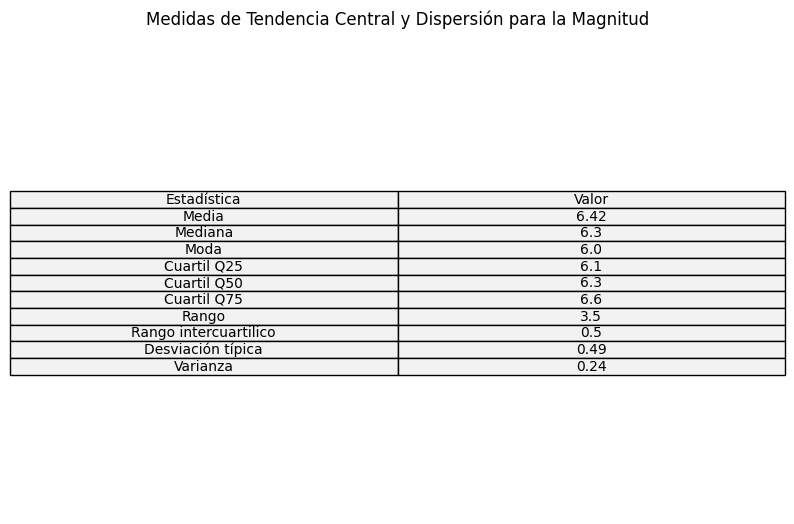

In [47]:
mag = sismos['mag'] # Variable cuantitativa

# Medidas de tendencia central
media = np.mean(mag)
mediana = np.median(mag)
moda = mag.mode()[0] 

# Medidas de posición
cuartiles = np.percentile(mag, [25, 50, 75])
q_25, q_50, q_75 = cuartiles[0], cuartiles[1], cuartiles[2]

# Medidas de dispersión
rango = np.ptp(mag)
rango_intercuartilico = q_75 - q_25
desviacion_tipica = np.std(mag)
varianza = np.var(mag)

# DataFrame para organizar los datos
data = {
    'Estadística': ['Media', 'Mediana', 'Moda', 'Cuartil Q25', 'Cuartil Q50', 'Cuartil Q75', 'Rango', 'Rango intercuartilico', 'Desviación típica', 'Varianza'],
    'Valor': [round(media,2), mediana, moda, q_25, q_50, q_75, rango, rango_intercuartilico, round(desviacion_tipica,2), round(varianza,2)]
}

tabla_datos = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Creación de la tabla
tabla = ax.table(cellText=tabla_datos.values,
                 colLabels=tabla_datos.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f2f2f2'] * len(tabla_datos.columns),
                 cellColours=[['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2']])
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
plt.title('Medidas de Tendencia Central y Dispersión para la Magnitud', pad = 20)
plt.show()

Como se puede apreciar, la media en la magnitud es de 6.42, la mediana es de 6.3 y la moda es de 6.0 como se había discutido anteriormente.
Por otra parte, el 25% de los datos son menores o iguales a 6.1 de magnitud, el 50% de los datos son de 6.3 (mediana) y el 75% son menores o iguales 6.6 de magnitud.
El rango es de 3.5, lo que significa que la diferencia entre la magnitud más baja y la más alta es de 3.5 de magnitud.
El rango intercuartílico (IQR) es de 0.5, lo que indica la dispersión en la mitad central de las magnitudes.
La desviación típica es de 0.49, sugiriendo que las magnitudes individuales tienden a desviarse alrededor de 0.49 en promedio con respecto a la media.
La varianza es de 0.24.

#### Haciendo lo mismo, pero para el caso de la hora, quedría de la siguiente manera.

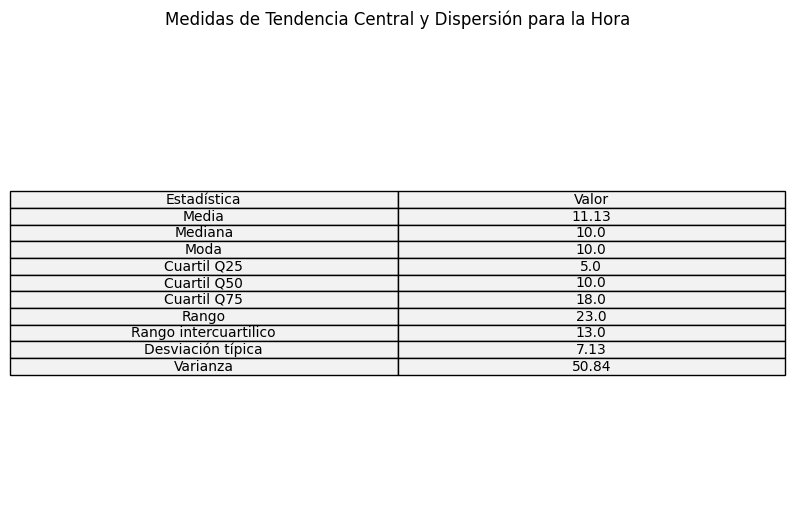

In [48]:
hora = sismos['Hora'] # Variable cuantitativa

# Medidas de tendencia central
media = np.mean(hora)
mediana = np.median(hora)
moda = hora.mode()[0] 

# Medidas de posición
cuartiles = np.percentile(hora, [25, 50, 75])
q_25, q_50, q_75 = cuartiles[0], cuartiles[1], cuartiles[2]

# Medidas de dispersión
rango = np.ptp(hora)
rango_intercuartilico = q_75 - q_25
desviacion_tipica = np.std(hora)
varianza = np.var(hora)

# DataFrame para organizar los datos
data = {
    'Estadística': ['Media', 'Mediana', 'Moda', 'Cuartil Q25', 'Cuartil Q50', 'Cuartil Q75', 'Rango', 'Rango intercuartilico', 'Desviación típica', 'Varianza'],
    'Valor': [round(media,2), mediana, moda, q_25, q_50, q_75, rango, rango_intercuartilico, round(desviacion_tipica,2), round(varianza,2)]
}

tabla_datos = pd.DataFrame(data)
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Creación de la tabla
tabla = ax.table(cellText=tabla_datos.values,
                 colLabels=tabla_datos.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f2f2f2'] * len(tabla_datos.columns),
                 cellColours=[['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2'],
                              ['#f2f2f2', '#f2f2f2']])
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
plt.title('Medidas de Tendencia Central y Dispersión para la Hora', pad = 20)
plt.show()

Como se puede observar, la moda es a las 10:00 hrs, al igual que la mediana.